In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
# Check for null Values

In [4]:
df.isnull().sum()

df.info()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


0

In [5]:
# Data Cleaning

In [6]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df['Ram']=df['Ram'].str.replace('GB', '')
df['Weight']=df['Weight'].str.replace('kg', '')

df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')

df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [8]:
df['Y_Res']=df['ScreenResolution'].apply(lambda x:x.split('x')[1])
df['X_Res']=df['ScreenResolution'].apply(lambda x:x.split('x')[0])

df['X_Res']=df['X_Res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df['X_Res']=df['X_Res'].astype('int')
df['Y_Res']=df['Y_Res'].astype('int')

In [9]:
df['ppi']=(((df['X_Res']**2)+(df['Y_Res']**2))**0.5/df['Inches']).astype('float')

In [10]:
df.corr()['ppi']

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_5332\1292443365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['ppi']


Inches   -0.414804
Ram       0.303763
Weight   -0.323240
Price     0.473487
Y_Res     0.939363
X_Res     0.931217
ppi       1.000000
Name: ppi, dtype: float64

In [11]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot: xlabel='Touchscreen', ylabel='Price'>

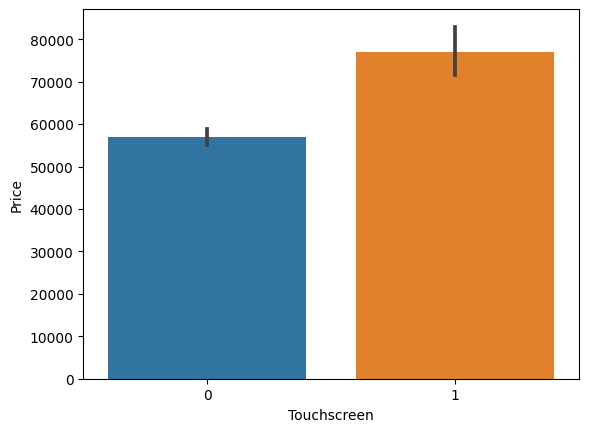

In [12]:
import seaborn as sns
sns.barplot(x=df['Touchscreen'],y=df['Price'])

<AxesSubplot: xlabel='Ips', ylabel='Price'>

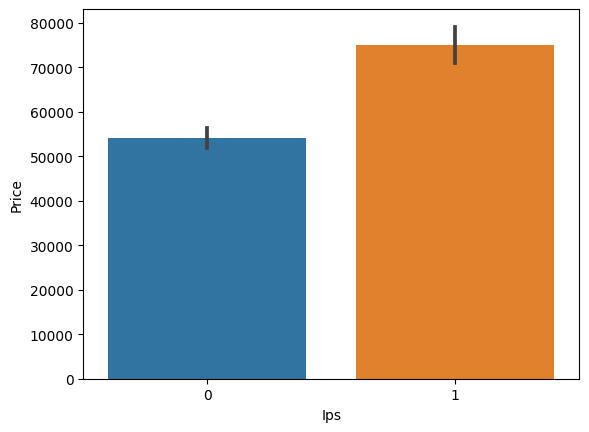

In [13]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [14]:
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Inches','Y_Res','X_Res'],inplace=True)

In [15]:
# Visualization

In [16]:
import seaborn as sns

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_5332\344234588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

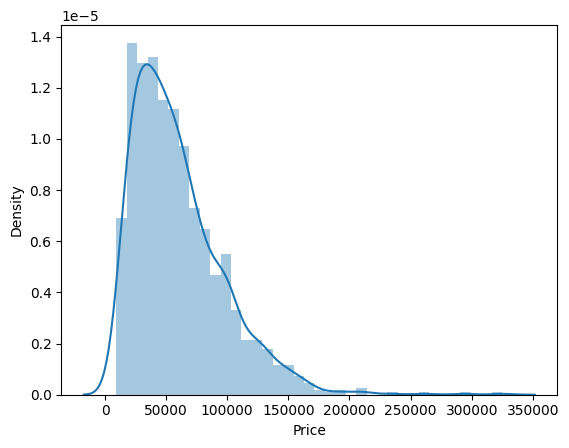

In [17]:
sns.distplot(df['Price'])


<AxesSubplot: >

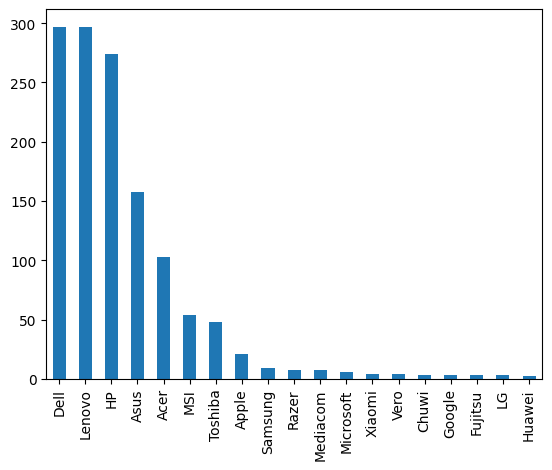

In [18]:
df['Company'].value_counts().plot(kind='bar')

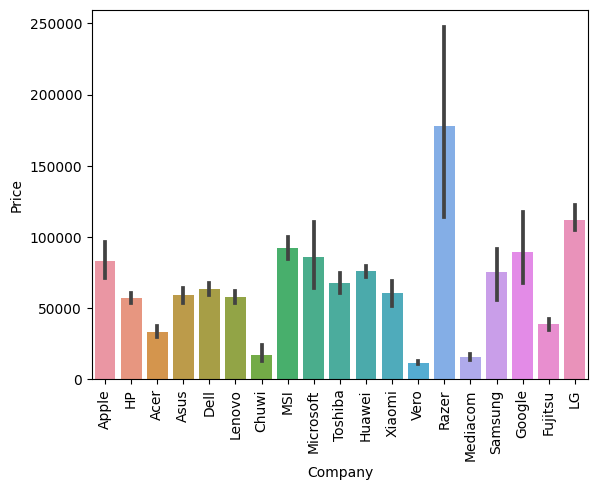

In [19]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

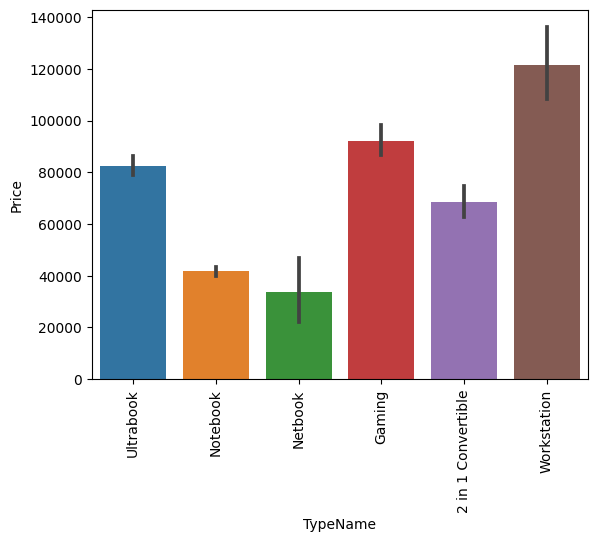

In [20]:
import matplotlib.pyplot as plt
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [21]:
df['CPU Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

def fetch_processor(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD"

df['CPU']=df['CPU Name'].apply(fetch_processor)
df.drop(columns={'Cpu','CPU Name'},inplace=True)

<AxesSubplot: >

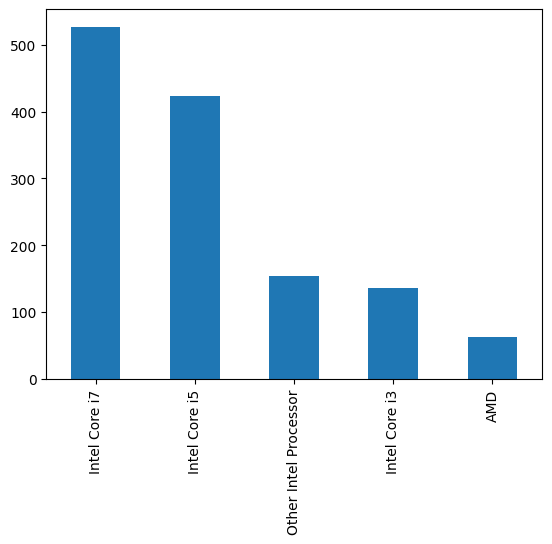

In [22]:
df['CPU'].value_counts().plot(kind='bar')

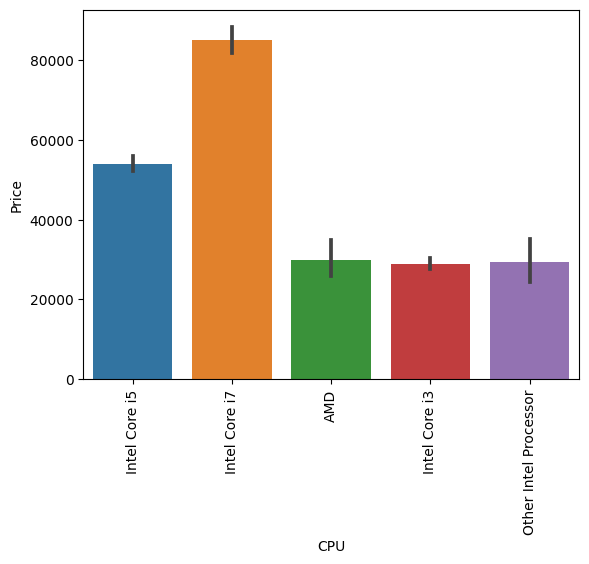

In [23]:
sns.barplot(x=df['CPU'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

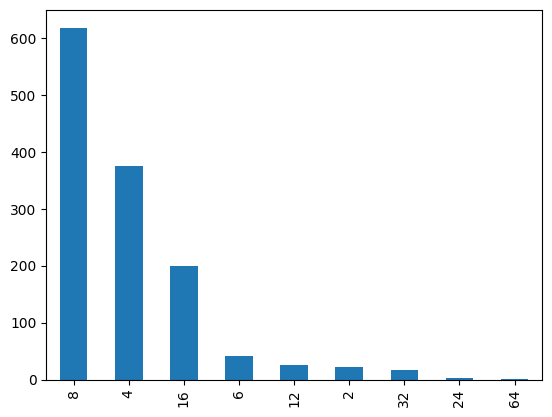

In [24]:
df['Ram'].value_counts().plot(kind='bar')

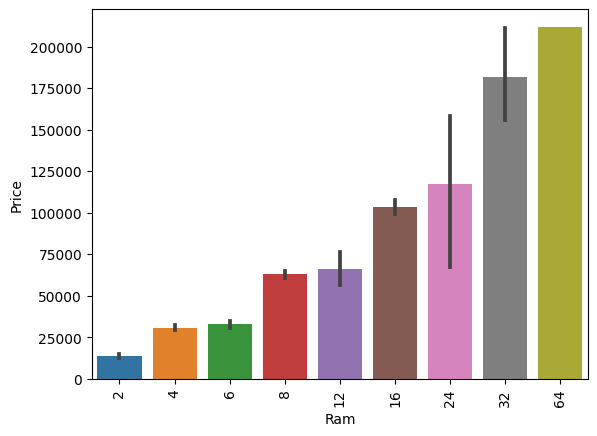

In [25]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [26]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split("+",n=1,expand=True)

df['first']=new[0]
df['first']=df['first'].str.strip()

df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1FlashStorage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first'] = df['first'].replace(r'\D', ' ', regex=True)
df['second'].fillna("0",inplace=True)

df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2FlashStorage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second'] = df['second'].replace(r'\D', ' ', regex=True)

df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)

df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1FlashStorage']+df['second']*df['Layer2FlashStorage'])

df.drop(columns={'first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1FlashStorage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2FlashStorage','Memory'},inplace=True)

In [27]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,Touchscreen,Ips,CPU,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,0,1,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,111.935204,0,0,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,100.454670,0,0,Intel Core i7,1000,0,0,0


In [28]:
df['GPU']=df['Gpu'].apply(lambda x:x.split()[0])

In [29]:
df.drop(columns={'Hybrid','Flash_Storage','Gpu'},inplace=True)

In [30]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,Touchscreen,Ips,CPU,HDD,SSD,GPU
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,111.935204,0,0,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,100.454670,0,0,Intel Core i7,1000,0,AMD


In [31]:
df=df[df['GPU']!='ARM']

In [32]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,Touchscreen,Ips,CPU,HDD,SSD,GPU
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,157.350512,1,1,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,276.053530,1,1,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,111.935204,0,0,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,100.454670,0,0,Intel Core i7,1000,0,AMD


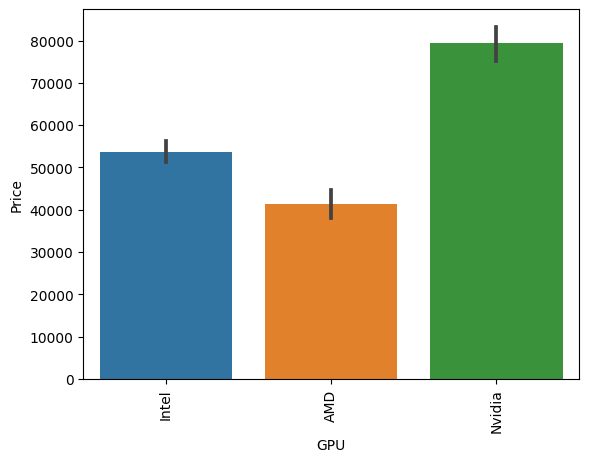

In [33]:
sns.barplot(x=df['GPU'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [35]:
def fetch_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return "Windows"
    elif text == 'macOS' or text == 'Mac OS X':
        return "Mac"
    else:
        return "No OS/Chrome/Android"


In [36]:
df['Op_Sys']=df['OpSys'].apply(fetch_os)

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_5332\2558816310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Op_Sys']=df['OpSys'].apply(fetch_os)


In [37]:
df.drop(columns={'OpSys'},inplace=True)

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_5332\2339546927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns={'OpSys'},inplace=True)


In [38]:
df

,Company,TypeName,Ram,Weight,Price,ppi,Touchscreen,Ips,CPU,HDD,SSD,GPU,Op_Sys
0,Apple,Ultrabook,8,1.37,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel,No OS/Chrome/Android
3,Apple,Ultrabook,16,1.83,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,157.350512,1,1,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,276.053530,1,1,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,111.935204,0,0,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,100.454670,0,0,Intel Core i7,1000,0,AMD,Windows


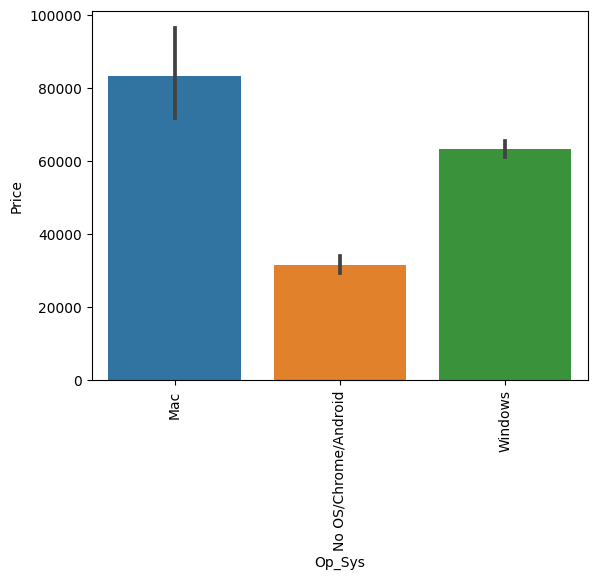

In [39]:
sns.barplot(x=df['Op_Sys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_5332\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

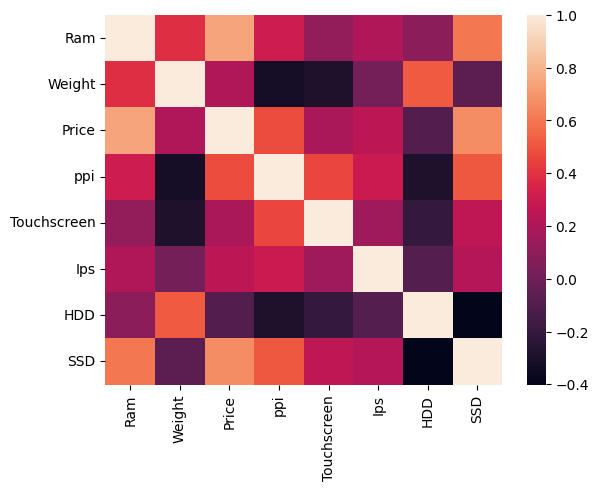

In [40]:
sns.heatmap(df.corr())

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_5332\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<AxesSubplot: xlabel='Price', ylabel='Density'>

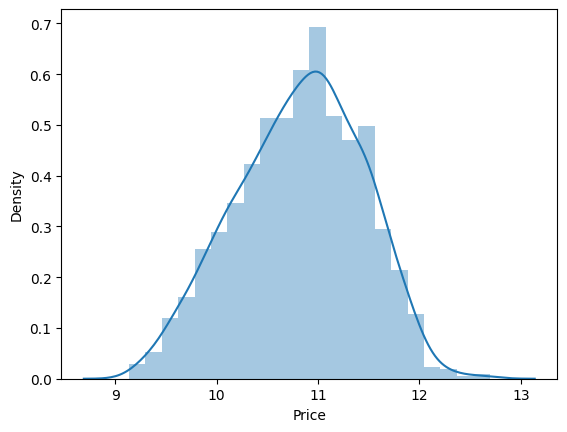

In [41]:
sns.distplot(np.log(df['Price']))

In [42]:
X=df.drop(columns={'Price'})
Y=np.log(df['Price'])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=22)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8310853937292327
MAE 0.21182834804732775


In [61]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


# RIDGE

In [56]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=Ridge(alpha=10)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8283516248484568
MAE 0.2152584616350158


# Lasso

In [57]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=Lasso(alpha=0.001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8259346032567785
MAE 0.21756422097295677


# KNeighborsRegressor

In [58]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8045953563237532
MAE 0.20685440040208963


# DecisionTreeRegressor

In [59]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8411784498034995
MAE 0.19791633828119226


# RandomForestRegressor

In [60]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8876846702979906
MAE 0.1597205444361812


# GradientBoostingRegressor

In [65]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.9041758119361771
MAE 0.14472309671798464


# AdaBoostRegressor

In [64]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.7772646595941106
MAE 0.247101075234522


# SVR

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

In [ ]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

# ExtraTrees

In [63]:

step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder="passthrough")
step2=ExtraTreesRegressor(n_estimators=100,
                           random_state=3,
                           #max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2_score 0.8807474353024528
MAE 0.1632409571697559


### Exporting the Model

In [67]:
import pickle

In [69]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))